<a href="https://colab.research.google.com/github/marina554/accounting-practice/blob/main/%E5%88%86%E6%9E%90%E3%83%BB%E3%82%B0%E3%83%A9%E3%83%95%E5%8C%96ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd

# サンプル取引データを作成
data = [
    ["2025-11-01", "売上", "現金", 100000, "商品販売"],
    ["2025-11-02", "仕入", "買掛金", 30000, "商品仕入"],
    ["2025-11-03", "家賃", "現金", 20000, "事務所家賃"],
    ["2025-11-04", "資本金", "現金", 50000, "出資金受取"],
]
df = pd.DataFrame(data, columns=["date", "debit", "credit", "amount", "memo"])

# CSVとして保存
df.to_csv("transactions.csv", index=False)
print("transactions.csv を作成しました。")


transactions.csv を作成しました。


In [9]:
# キーワード → 勘定科目 のマッピング辞書
account_map = {
    "売上": "売上高",
    "販売": "売上高",
    "仕入": "仕入高",
    "家賃": "地代家賃",
    "賃料": "地代家賃",
    "電気": "水道光熱費",
    "ガス": "水道光熱費",
    "水道": "水道光熱費",
    "通信": "通信費",
    "出資": "資本金",
}


In [25]:
def detect_account(memo):
    for keyword, account in account_map.items():
        if keyword in memo:
            return account
    return "未分類"


In [26]:
import pandas as pd

# CSV読み込み
df = pd.read_csv("transactions.csv")

# 自動判定
df["detected_account"] = df["memo"].apply(detect_account)

print(df)


         date debit credit  amount   memo detected_account
0  2025-11-01    売上     現金  100000   商品販売              売上高
1  2025-11-02    仕入    買掛金   30000   商品仕入              仕入高
2  2025-11-03    家賃     現金   20000  事務所家賃             地代家賃
3  2025-11-04   資本金     現金   50000  出資金受取              資本金


In [31]:
# 売上高・費用合計・利益
sales = summary.get("売上高", 0)
expenses = summary.get("仕入高", 0) + summary.get("地代家賃", 0) + summary.get("水道光熱費", 0) + summary.get("通信費", 0)
profit = sales - expenses

print(f"売上高: {sales:,}円")
print(f"費用合計: {expenses:,}円")
print(f"当期純利益: {profit:,}円")
print(f"利益率: {profit / sales * 100:.1f}%")


売上高: 100,000円
費用合計: 50,000円
当期純利益: 50,000円
利益率: 50.0%


In [29]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 24.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=d8238ab2bb234b9d05bd087597cbad55998e99e7a7c242dff85a9488e357a54c
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize-matplotlib


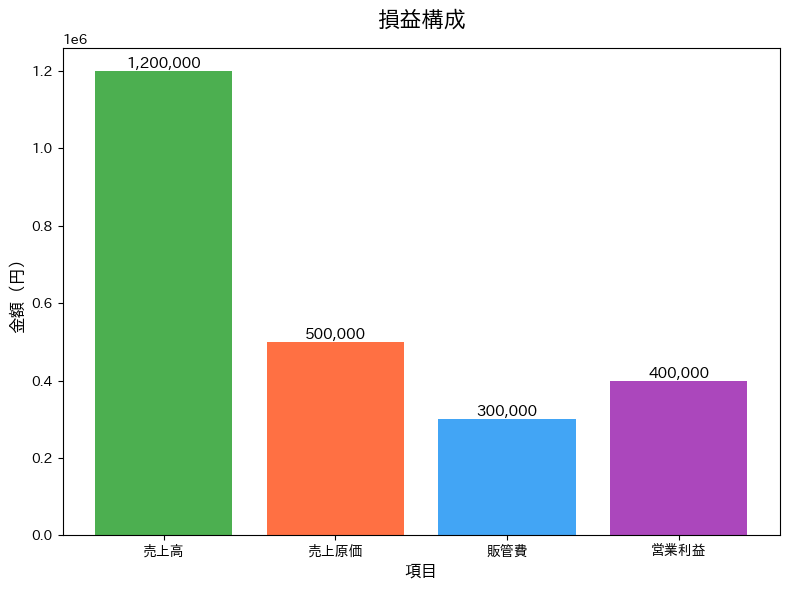

In [30]:
import matplotlib.pyplot as plt
import japanize_matplotlib  # 日本語対応
import pandas as pd

# データの作成
data = {
    "項目": ["売上高", "売上原価", "販管費", "営業利益"],
    "金額": [1200000, 500000, 300000, 400000]
}
df = pd.DataFrame(data)

# グラフ作成
plt.figure(figsize=(8, 6))
bars = plt.bar(df["項目"], df["金額"], color=["#4CAF50", "#FF7043", "#42A5F5", "#AB47BC"])

# タイトル・軸ラベル設定
plt.title("損益構成", fontsize=16, pad=15)
plt.xlabel("項目", fontsize=12)
plt.ylabel("金額（円）", fontsize=12)

# 数値ラベルを各棒の上に表示
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"{bar.get_height():,}",
        ha="center",
        va="bottom",
        fontsize=11
    )

# レイアウト調整（文字の重なり防止）
plt.tight_layout()

plt.show()

